# **Linear Models**
---
## **Summary**
to be added ..
    
## **References**
1. Goodfellow, I., Bengio, Y., Courville, A. 2016. Deep Learning. MIT Press.
2. Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn & TensorFlow. O'Reily.
3. Albon, C. 2018. Python Machine Learning Cookbook. O'Reily.
4. IBM Data Science Professional Certificate Program. 2018. 
5. MIT Data Science and Big Data Cerfiticate Program. 2019.

## **Concept**
### **Linear Regression**
#### **Simple Linear Regression**
* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)
* $y_i = \beta x_i + \alpha + \varepsilon_i$
    
#### **Multiple Linear Regression**
* multiple predictor (independent) variable predictions
* $y_i = \alpha + \beta_i x_{i1} + \dots + \beta_k x_{ik} + \varepsilon_i$
* **Evaluation**: *distribution plot*

#### **Residual Plot**
* Difference between $y_i$ and $\hat{y_i}$.
* Random spreaded out residuals $\Longrightarrow$ *constant variance* $\Longrightarrow$ **good** fit

#### **Evaluation**
* **$R^2$**
* **Mean Squared Error** (MSE): cost function of linear regression model
    * $MSE(X, h_\theta) = \frac1{m} \sum_{i=0}^m (\theta^ T\cdot{x^i} - y^i)^2$
    * **Normal Equation** $\hat{\theta} = (X^T\cdot{X}^{-1})\cdot{X^T}\cdot{y}$

#### **Regularization**
* **Ridge regression**
    * Adding $\alpha\sum_{i=1}^n\theta_i^2$ to the cost function $\Longrightarrow$ weights $\downarrow$
    * ***the Ridge Regression cost function:***
        * $J(\theta) = MSE(\theta) + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$
        * $J(\theta) = \frac1{m}\sum_{i=1}^m(\theta^T\cdot{X^i} - y^i)^2 + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$
    * ***$\alpha$*** regularize the model
        * $\alpha$ = 0 $\Longrightarrow$ Linear Regression Model
        * $\alpha$ $\uparrow$: weights $\Longrightarrow$ 0 $\Longrightarrow$ fitting line: a horizontal line close to mean
    * **Only** added to the cost function during the training; removed for evaluating the model's performance
    * **Important Notes**
        * the bias term $\theta_0$ is not regularized because the sum starts at i = 1;
        * if $ w = [\theta_1, \theta_2, ...., \theta_n]$, the regularization term is simply equal to $\frac1{2}(\|w\|_2)^2$, where $\|\cdot\|_2$ represents the norm of the weight vector.
        * it is really important to scale the data (e.g., using StanadardScalar), because the Ridge Regression model is sensitive to the scales of the input features.
    * **Two types**
        * **Closed-form** equation: $\hat{\theta} = (X^T\cdot{X} + \alpha A)^{-1}\cdot{X^T}\cdot{y}$
        * **Gradient Descent**: $\ell_2$ $\Longrightarrow$ $J(\theta)$ == half the squred of the $\ell_2$ norm of the weight vector
* **Lasso regression (Least Absolute Shrinkage and Selection Operator Regression)**
    * $\ell_1$ norm of the weight vector
    * cost function: $J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$
    * the weights of the least important features $\Longrightarrow$ 0
        * automatically performs the feature selection $\Longrightarrow$ a **'sparse model'** output
    * **Need to gradually reduce the learning rate $\Longrightarrow$ the global minimum**
* **Elastic Net**
    * a middle ground between the Ridge Regression and Lasso Regression
    * cost function: $J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n|\theta| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$
* **Conclusive suggestions** 
    * **no** purely Linear Regression
    * **add** some regularization

### **Pipelines**
Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.




In [1]:
# Simple linear regression
# import basic python libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

/Users/mengchen/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm = LinearRegression()
lm

X = df[['highway-mpg']]
y = df['price']

yhat=lm.predict(X)

lm.intercept_
lm.coef_

In [ ]:
# e.g.,
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
yhat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Fitting the polynomial using the **np.polyfit**, then use the function **np.poly1d** to display the polynomial function

In [5]:
# Use the following function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Example for polynomial function
# set variables
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

# plot the results
PlotPolly(p,x,y, 'highway-mpg')

**The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:**

\begin{equation*}
\hat{Y} = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}

We can perform a polynomial transform on multiple features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

### 5. Pipelines
Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)


### 6. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **$R^2$ / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [ ]:
# single and multiple
# R squre
lm.score(X, y)

# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y, yhat)

# Polynomial
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
mean_squared_error(y, p(x))

### 7. Decision Making: Determining a Good Model Fit

R-squred, MSE, and etc

<a id="ref9"></a>
<h1 align=center><font size = 5>The Details of Evaluations of Linear Regression Model</font></h1>

### 1. Linear Regression

1.1.1 Mean Squre error (MSE) cost function for the Linear Regression Model

$$MSE(X, h_\theta) = \frac1{m} \sum_{i=0}^m (\theta^ T\cdot{x^i} - y^i)^2$$

1.1.2 The Normal Equation
$$\hat{\theta} = (X^T\cdot{X}^{-1})\cdot{X^T}\cdot{y}$$

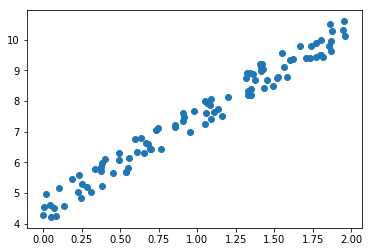

In [25]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.show()

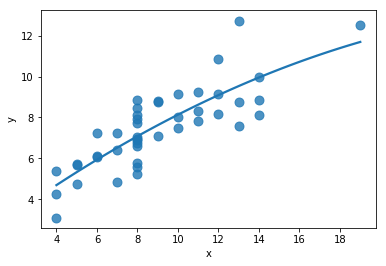

In [36]:
ans = sns.load_dataset("anscombe")
ax = sns.regplot(x="x", y="y", data=ans,
                 scatter_kws={"s": 80},
                 order=2, ci=None, truncate=True)

#sns.regplot(x=X, y=y, color='g')

1.1.3 Compute $\hat{\theta}$ using the Normal Equation

In [105]:
X_b = np.c_[np.ones((100,1)), X] # add x0 =1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.45302277],
       [3.04972506]])

Making a prediction using $\hat{\theta}$

In [106]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.45302277],
       [10.55247289]])

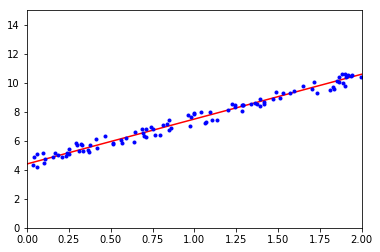

In [107]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

1.1.4 Using the Scikit-Learn package

In [108]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.45302277]), array([[3.04972506]]))

<a id="ref11"></a>
### 2. Polynomial Regression

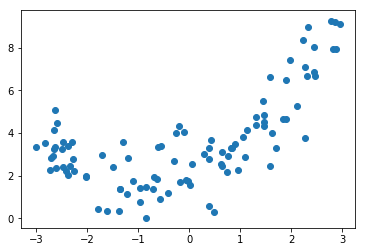

In [38]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

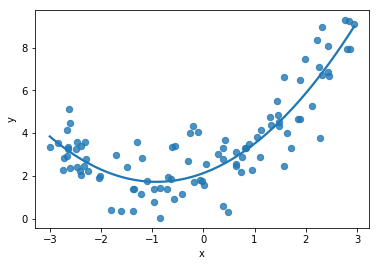

In [74]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df =  pd.concat([df_x, df_y], axis=1)
df.columns = ['x', 'y']
ax = sns.regplot(x='x', y='y', data=df, scatter_kws={"s": 40}, order=2, ci=None, truncate=True)

In [61]:
# Use the following function to plot the polynomial data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Here we use a polynomial; Need some work
f = np.polyfit(X, y, 2)
p = np.poly1d(f)

# plot the results
PlotPolly(p,X,y, 'Random')

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.80019426]
[-2.80019426  7.84108788]


In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11162455]), array([[0.95657309, 0.47337037]]))

##### PolynomailFeatures(degree = d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features, where n! is the factorial of n, equal to 1 $\times$2$\times$3$\times$....$\times$n. ***Beware of the combinationtorial explosion of the number of features!***

### 2.1 Learning Curves

* If the mode perform well on the training data but cross-validation metrics is poor, the model is overfitting; both are poor, then it is underfitting.

* Another way $\Longrightarrow$ ***Learning Curves***

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')

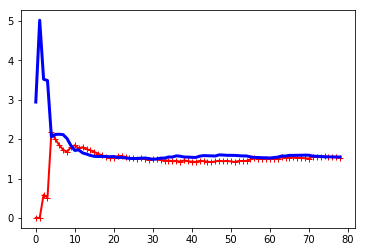

In [124]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

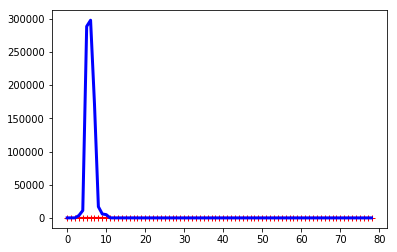

In [125]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline ((
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

#### Note for the overfiiting and underfittin the models

* Typically the error of the test model is really high and research the plateau; with more training data, there is no better resutls for the both training model  $\Longrightarrow$ ***Underfitting***

* The error of the test model is really low, and large gaps between the error curves of the traing and testing data; with more training input, the error of the testing modle will be close the those of the training model $\Longrightarrow$ ***Overfitting***

* Bias (incorrect assumption), Variance (model is excessively sensititive to the small variance; e.g., high degree polynomial model), and Irreduciable errors (nosies in the data; cleaning up data and checking the data input)


<a id="ref12"></a>
### 3. Regularized Linear Models
* ***Linear Model*** $\Longrightarrow$ Reducing the weight; Ridge Regression, Lasso Regression, Elastic Net
* ***Polynomial Model*** $\Longrightarrow$ Reducing the degree

### 3.1 Ridge Regression model

Adding $\alpha\sum_{i=1}^n\theta_i^2$ to the cost function $\Longrightarrow$ making sure the model is fitting the data, but also keep the weights as small as possible
* ***Should only be added to the cost function during the training; once trained, the unregularized measured should be used to evaluate the model's performance***
* ***$\alpha$*** regularize the model
* $\alpha$ = 0 $\Longrightarrow$ Linear Regression Model
* $\alpha$ is very large, all weights will be close to 0, data fitting line will be horizontal line close to mean

* ***In general, the Ridge Regression cost function:***
$$J(\theta) = MSE(\theta) + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$$
$$J(\theta) = \frac1{m}\sum_{i=1}^m(\theta^T\cdot{X^i} - y^i)^2 + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$$

#### ***Important Note:*** 
* the bias term $\theta_0$ is not regularized because the sum starts at i = 1;
* if $ w = [\theta_1, \theta_2, ...., \theta_n]$, the regularization term is simply equal to $\frac1{2}(\|w\|_2)^2$, where $\|\cdot\|_2$ represents the norm of the weight vector.
* it is really important to scale the data (e.g., using StanadardScalar), because the Ridge Regression model is sensitive to the scales of the input features.

#### 3.1.1 Two types of the Ridge Regression
* ***Closed-form equation***  $$\hat{\theta} = (X^T\cdot{X} + \alpha A)^{-1}\cdot{X^T}\cdot{y}$$

In [126]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.98189316]])

* ***Gradient Descent***
* $\ell_2$ indicates SGD has a regularization term to the cost function that equals to half the squred of the $\ell_2$ norm of the weight vector

In [127]:
sgd_reg = SGDRegressor(penalty = 'l2') 
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.97129474])

### 3.2 Lasso Regression
* Least Absolute Shrinkage and Selection Operator Regression
* use $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm
$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$$
* Tends to completely eliminate the weights of the least important features; in other words, the Lasso Regression automatically performs the feature selection and outputs a ***"sparse model"***
* ***Need to gradually reduce the learning rate to converge to the global minimum***

In [128]:
from sklearn.linear_model import Lasso # same the SGDRegressor(penalty = 'l1')
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.93546649])

### 3.3 Elastic Net $\Longrightarrow$
* a middle ground between the Ridge Regression and Lasso Regression
$$ J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n|\theta| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$
* in general, avoid the purely Linear Regression; add some regularization

In [129]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.93832332])

### 3.4 Early Stopping --- stop training the model as the validation error reaches minimum

In [3]:
import numpy as np
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train_poly)
scaler.fit(X_val_poly)
X_train_poly_scaled =  scaler.transform(X_train_poly)
X_val_poly_scaled =  scaler.transform(X_val_poly)

sgd_reg =  SGDRegressor(n_iter = 1, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_pred, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch
best_model

NameError: name 'SGDRegressor' is not defined